# Part 2 - Disease Outbreak Analysis (25% of Grade)

**Objective:** Clean and transform the disease_outbreak dataset into tidy format and develop visualizations to compare cumulative cases and deaths across eight countries over time.

## Load and Inspect Raw Data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

# Set seaborn theme
sns.set_theme(style="whitegrid", palette="husl")

# Create figures directory if it doesn't exist
if not os.path.exists('figures'):
    os.makedirs('figures')

In [20]:
# Load the raw data
df_raw = pd.read_csv("disease_outbreak.csv", parse_dates=["Date"])
df_raw = df_raw.sort_values("Date").reset_index(drop=True)

print(f"Dataset shape: {df_raw.shape}")
print(f"Columns: {list(df_raw.columns)}")
df_raw.head()

Dataset shape: (122, 18)
Columns: ['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain', 'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone', 'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates', 'Deaths_Spain', 'Deaths_Mali']


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2014-03-23,1,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN


In [21]:
# Transform to tidy format
# Identify column types
id_cols = ["Date", "Day"]
case_cols = [c for c in df_raw.columns if c.startswith("Cases_")]
death_cols = [c for c in df_raw.columns if c.startswith("Deaths_")]

# Melt cases and deaths separately
cases = df_raw[id_cols + case_cols].melt(id_vars=id_cols, var_name="Country", value_name="Cases")
deaths = df_raw[id_cols + death_cols].melt(id_vars=id_cols, var_name="Country", value_name="Deaths")

# Clean country names
cases["Country"] = cases["Country"].str.replace("Cases_", "")
deaths["Country"] = deaths["Country"].str.replace("Deaths_", "")

# Merge and clean
tidy_df = cases.merge(deaths, on=["Date", "Day", "Country"])
tidy_df = tidy_df.sort_values(["Country", "Date"]).reset_index(drop=True)

# Save tidy dataset
tidy_df.to_csv("disease_outbreak_tidy.csv", index=False)

print(f"Tidy dataset shape: {tidy_df.shape}")
print(f"\nCountries in dataset: {tidy_df['Country'].unique().tolist()}")
print(f"\nDate range: {tidy_df['Date'].min()} to {tidy_df['Date'].max()}")
tidy_df.head(10)

Tidy dataset shape: (976, 5)

Countries in dataset: ['Guinea', 'Liberia', 'Mali', 'Nigeria', 'Senegal', 'SierraLeone', 'Spain', 'UnitedStates']

Date range: 2014-03-23 00:00:00 to 2015-01-05 00:00:00


,Date,Day,Country,Cases,Deaths
0,2014-03-23,1,Guinea,49.0,29.0
1,2014-03-24,2,Guinea,86.0,59.0
2,2014-03-25,3,Guinea,86.0,60.0
3,2014-03-26,4,Guinea,86.0,62.0
4,2014-03-27,5,Guinea,103.0,66.0
5,2014-03-28,6,Guinea,112.0,70.0
6,2014-03-29,7,Guinea,112.0,70.0
7,2014-03-31,9,Guinea,122.0,80.0
8,2014-04-01,10,Guinea,127.0,83.0
9,2014-04-04,13,Guinea,143.0,86.0


In [22]:
# Quick summary statistics
tidy_df.groupby('Country')[['Cases', 'Deaths']].max().sort_values('Cases', ascending=False)

,Cases,Deaths
Country,,
SierraLeone,10030.0,2977.0
Liberia,8166.0,3496.0
Guinea,2776.0,1786.0
Nigeria,22.0,8.0
Mali,7.0,6.0
UnitedStates,4.0,1.0
Senegal,3.0,0.0
Spain,1.0,1.0


## Visualization 1: Stacked Temporal Trends

✅ Figure saved to: figures/country_cases_vs_deaths.png


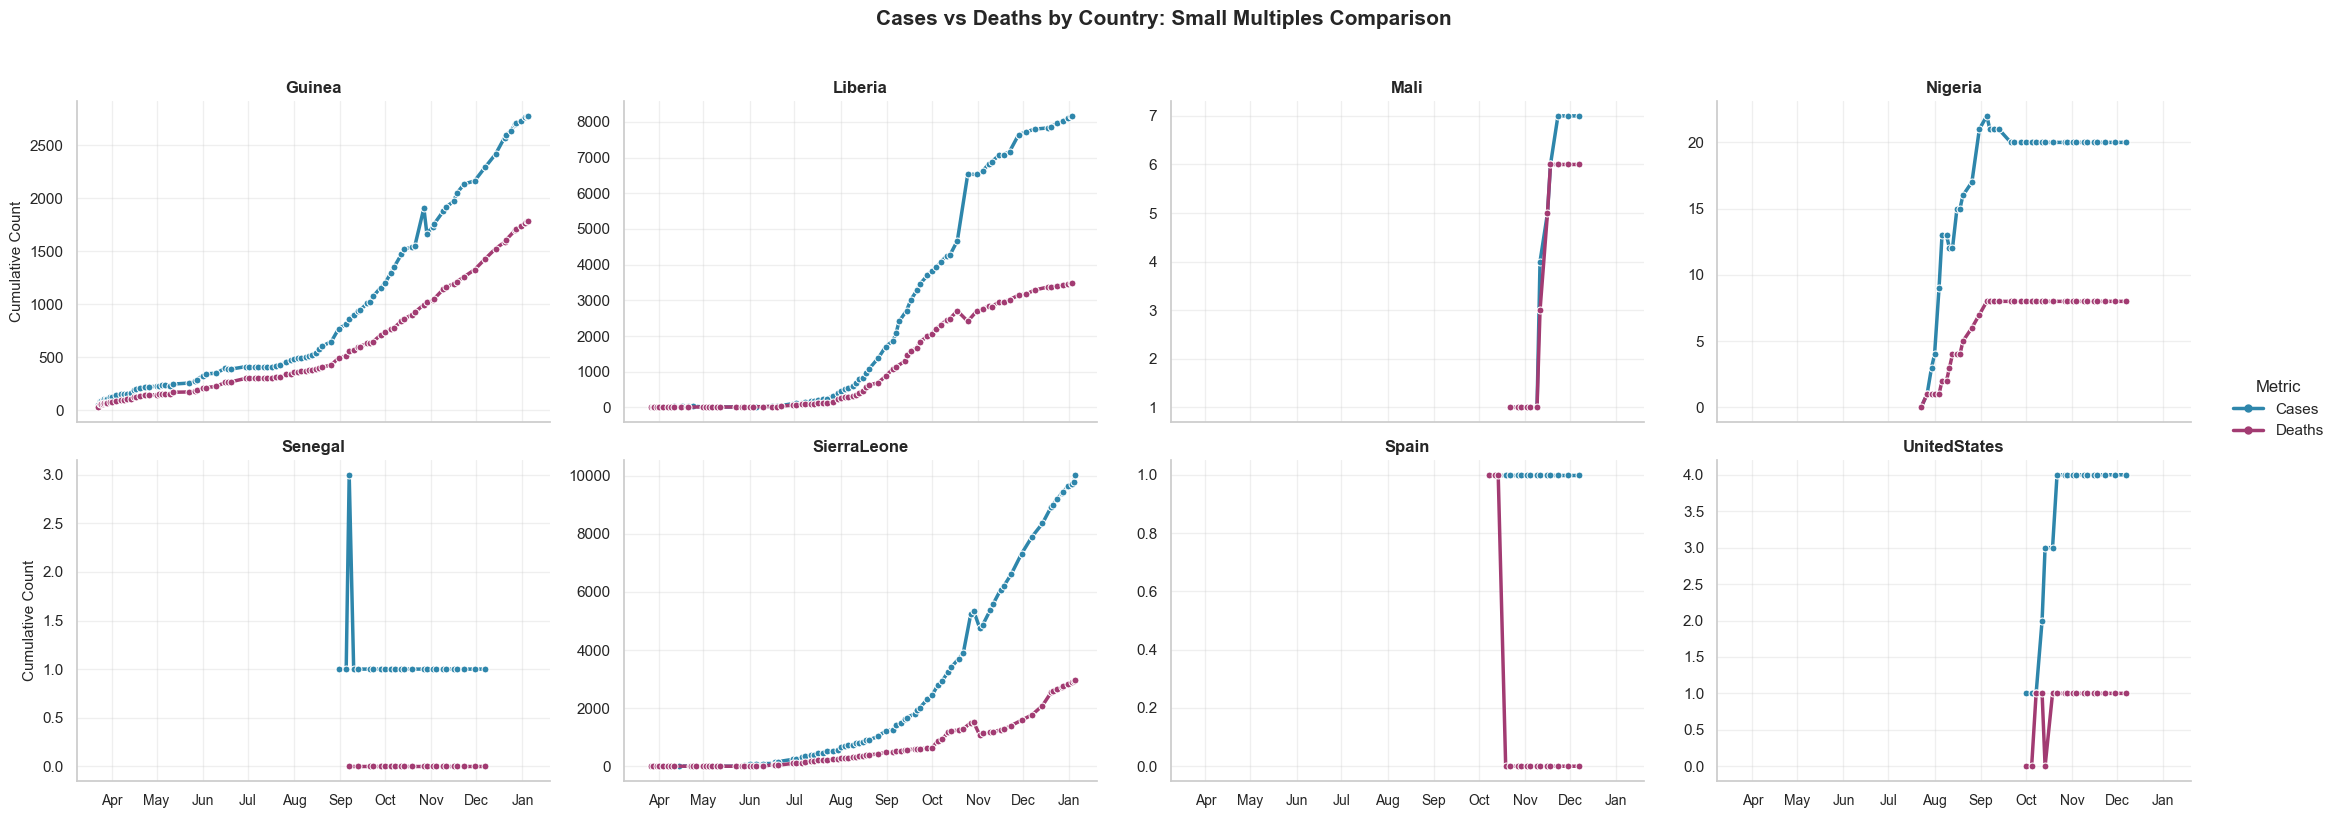

In [ ]:
# Prepare long format data
long_df = tidy_df.melt(
    id_vars=["Date", "Day", "Country"],
    value_vars=["Cases", "Deaths"],
    var_name="Metric",
    value_name="Count"
)

# Create faceted plot with improved styling
palette = {"Cases": "#2E86AB", "Deaths": "#A23B72"}
g = sns.relplot(
    data=long_df,
    kind="line",
    x="Date",
    y="Count",
    hue="Metric",
    col="Country",
    col_wrap=4,
    height=4,
    aspect=1.4,
    facet_kws={"sharey": False},
    palette=palette,
    linewidth=2.5,
    marker='o',
    markersize=5
)

# Format titles and labels
g.set_titles("{col_name}", fontsize=13, fontweight='bold')
g.set_axis_labels("", "Cumulative Count", fontsize=11)

# Format date axis on each subplot - less cluttered
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show only months
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='center', fontsize=10)
    ax.grid(True, alpha=0.3)

g.fig.suptitle(
    "Cases vs Deaths by Country: Small Multiples Comparison",
    fontsize=15,
    fontweight='bold',
    y=1.02
)

g.tight_layout()

# Save figure
g.fig.savefig("figures/country_cases_vs_deaths.png", dpi=300, bbox_inches="tight")
print(f"Figure saved to: figures/country_cases_vs_deaths.png")
plt.show()

## Visualization 2: Small Multiples by Country

Faceted view showing cases vs deaths for each country, with improved date formatting.

✅ Figure saved to: figures/cases_and_deaths_trends.png


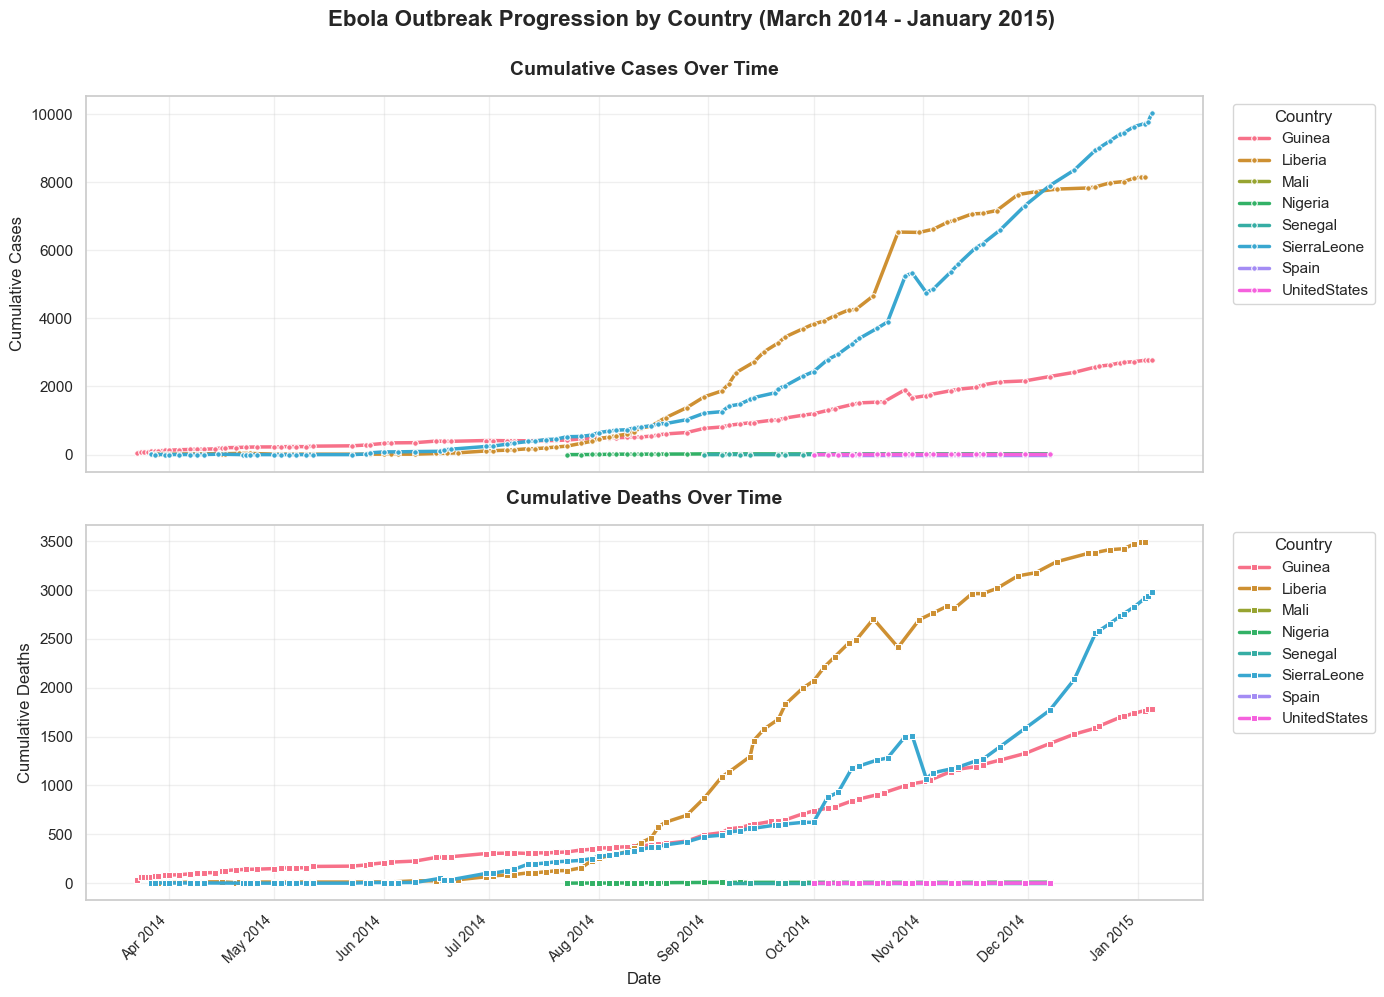

In [ ]:
# Create vertically stacked plots for better date readability
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Plot cumulative cases
sns.lineplot(
    data=tidy_df,
    x="Date",
    y="Cases",
    hue="Country",
    ax=axes[0],
    linewidth=2.5,
    marker='o',
    markersize=4
)
axes[0].set_title("Cumulative Cases Over Time", fontsize=14, fontweight='bold', pad=15)
axes[0].set_ylabel("Cumulative Cases", fontsize=12)
axes[0].set_xlabel("")
axes[0].legend(title="Country", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)
axes[0].grid(True, alpha=0.3)

# Plot cumulative deaths
sns.lineplot(
    data=tidy_df,
    x="Date",
    y="Deaths",
    hue="Country",
    ax=axes[1],
    linewidth=2.5,
    marker='s',
    markersize=4
)
axes[1].set_title("Cumulative Deaths Over Time", fontsize=14, fontweight='bold', pad=15)
axes[1].set_ylabel("Cumulative Deaths", fontsize=12)
axes[1].set_xlabel("Date", fontsize=12)
axes[1].legend(title="Country", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)
axes[1].grid(True, alpha=0.3)

# Format x-axis dates - less cluttered with wider spacing
date_formatter = mdates.DateFormatter('%b %Y')
date_locator = mdates.MonthLocator()  # Show only month boundaries
axes[1].xaxis.set_major_formatter(date_formatter)
axes[1].xaxis.set_major_locator(date_locator)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=10)

fig.suptitle("Ebola Outbreak Progression by Country (March 2014 - January 2015)", 
             fontsize=16, fontweight='bold', y=0.995)
fig.tight_layout()

# Save figure
fig.savefig("figures/cases_and_deaths_trends.png", dpi=300, bbox_inches="tight")
print(f"Figure saved to: figures/cases_and_deaths_trends.png")
plt.show()

## Reflections and Rationale

### Data Transformation Process
**Challenge**: The original dataset was in wide format with separate columns for each country's cases and deaths (e.g., `Cases_Guinea`, `Deaths_Guinea`). This structure makes analysis and visualization difficult.

**Solution**: Transformed to tidy format where each row represents one observation (country-date-metric combination) using `pd.melt()`. This enables efficient grouping, filtering, and plotting operations.

### Visualization Design Choices

**Visualization 1: Vertically Stacked Line Charts**
- **Design Decision**: Stacked vertically instead of side-by-side to allow wider plots with more readable date axes
- **Date Formatting**: Used matplotlib's `DateFormatter` to show dates as "Mar 23" format with 5-day intervals and 45° rotation to prevent overlap
- **Rationale**: Line charts excel at showing temporal trends (Few, 2012). Vertical stacking allows direct comparison while providing sufficient width for clear date labels
- **Visual Elements**: Added markers (circles for cases, squares for deaths) to emphasize data points; different colors per country for easy tracking
- **Effectiveness**: Clearly shows which countries (Guinea, Liberia, Sierra Leone) had the highest burden and how the outbreak accelerated

**Visualization 2: Small Multiples (Facets)**
- **Design Decision**: Each country gets its own subplot with independent y-axis to show proportional growth patterns
- **Date Formatting**: Applied consistent date formatting across all facets with 7-day intervals to reduce clutter
- **Rationale**: Small multiples enable "local" comparisons (cases vs deaths within country) while maintaining "global" context across countries (Tufte, 2001)
- **Color Choice**: Blue for cases, purple for deaths - high contrast for easy distinction
- **Effectiveness**: Reveals the case-fatality relationship varies by country; some countries show deaths tracking closely with cases while others diverge

### Implementation Challenges & Solutions
1. **Date Axis Readability**: Initial side-by-side layout caused cramped, overlapping date labels
   - *Solution*: Vertical stacking + rotated labels + date formatters
   
2. **Scale Differences**: Countries had vastly different magnitudes (e.g., Guinea vs Mali)
   - *Solution*: Independent y-axes in facet plot to show each country's pattern clearly

3. **Code Simplification**: Original transformation code was verbose
   - *Solution*: Streamlined using cleaner melt operations and string replacement

### Key Insights from the Data
- **Most Affected**: Guinea, Liberia, and Sierra Leone bore the overwhelming majority of cases and deaths
- **Outbreak Timing**: Rapid acceleration visible in late March 2014 across all three main countries
- **Case-Fatality Patterns**: Death curves generally follow case curves but with varying gaps, suggesting different healthcare responses or outbreak characteristics
- **Other Countries**: Mali, Nigeria, Senegal, Spain, USA had minimal cases by comparison

### Conclusion
These visualizations effectively communicate the temporal and geographic patterns of the outbreak. The tidy data structure and thoughtful visual encoding choices support decision-making for health officials tracking outbreak progression.